In [1]:
import pandas as pd
import numpy  as np

import pickle
 
from pathlib import Path

import matplotlib.pyplot as plt


import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "Kang_Lupus"

data_path = Path ( data_folder + data_subfolder )

In [3]:
# output plots
Lg_plot_jpg = data_subfolder + "_Figure_3.jpg"
Sg_plot_jpg = data_subfolder + "_Figure_5.jpg"

# input data
nru_dict_pkl =  "nru_dict.pkl"
scanpy_variance_pkl = "residual_variance_scanpy.pkl"
SCT_variance_pkl = "SCT_v2_residual_variance.pkl"


# paths: output plots
Lg_plot_dsn = data_path / Lg_plot_jpg
Sg_plot_dsn = data_path / Sg_plot_jpg

# paths: input data
nru_dict_dsn = data_path / nru_dict_pkl
scanpy_variance_dsn = data_path / scanpy_variance_pkl
SCT_variance_dsn = data_path / SCT_variance_pkl

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]	

bins_500 = [ 0, 20, 50, 100, 200, 500, 1e6]
labels_500 = ['1-20', '21-50', '51-100', '101-200', '201-500', '501+']

In [5]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_gene_stats = nru_dict['df_gene_stats'] [[ 'nz_cells', 'M_g', 'A_g']]
df_gene_stats = df_gene_stats.assign(rank_A_g = df_gene_stats['A_g'].rank ( ascending=False ).values)

print ( '\n\n df_gene_stats'  )
print ( df_gene_stats  )
print ( '\n\n df_gene_stats.describe' )
print ( df_gene_stats.describe ( percentiles=pctl_list ) )



 df_gene_stats
                 nz_cells         M_g         A_g  rank_A_g
ENSG00000244734      2432  618.223412  583.983476       1.0
ENSG00000188536       614  187.010513  170.301545       2.0
ENSG00000167996     26522   95.555335   94.267171       3.0
ENSG00000206172       380  105.145843   93.234056       4.0
ENSG00000087086     23321   83.811940   82.854512       5.0
...                   ...         ...         ...       ...
ENSG00000136492        71    0.709007    0.612331   10603.5
ENSG00000253593        50    0.722536    0.612331   10603.5
ENSG00000172379        82    0.717869    0.612331   10603.5
ENSG00000226004        73    0.690656    0.612331   10603.5
ENSG00000123643        54    0.743041    0.612331   10603.5

[10619 rows x 4 columns]


 df_gene_stats.describe
           nz_cells           M_g           A_g      rank_A_g
count  10619.000000  10619.000000  10619.000000  10619.000000
mean    1425.094924      1.545574      1.299065   5310.000000
std     2977.933428      

In [6]:
df_Lg = pd.read_pickle ( scanpy_variance_dsn ).rename( columns={'CLIPPED':'L_g'} )
df_Lg = df_Lg.assign( rank_L_g = df_Lg['L_g'].rank ( ascending=False ).values,
                      clipping_effect = ( ~ ( df_Lg['L_g'] == df_Lg['UNCLIPPED'] ) ).astype(int) )

print ( '\n\n df_Lg'  )
print ( df_Lg  )
print ( '\n\n df_Lg.describe' )
print ( df_Lg.describe ( percentiles=pctl_list ) )

print (  '\n\n df_Lg[clipping_effect].sum() \n\n', df_Lg['clipping_effect'].sum()  )



 df_Lg
                       L_g   UNCLIPPED  rank_L_g  clipping_effect
ENSG00000244734  79.810010  546.699020       1.0                1
ENSG00000188536  64.410016  179.990128       2.0                1
ENSG00000167996  42.471471   42.471471       5.0                0
ENSG00000206172  56.161057  102.908438       3.0                1
ENSG00000087086  51.001116   51.001116       4.0                0
...                    ...         ...       ...              ...
ENSG00000136492   0.708888    0.708888   10589.0                0
ENSG00000253593   0.722437    0.722437   10579.0                0
ENSG00000172379   0.717648    0.717648   10582.0                0
ENSG00000226004   0.690486    0.690486   10601.0                0
ENSG00000123643   0.742950    0.742950   10559.0                0

[10619 rows x 4 columns]


 df_Lg.describe
                L_g     UNCLIPPED      rank_L_g  clipping_effect
count  10619.000000  10619.000000  10619.000000     10619.000000
mean       1.386865      

In [7]:
df_Sg = pd.read_pickle ( SCT_variance_dsn ).rename( columns={'residual_variance':'S_g'} )
df_Sg = df_Sg.assign(rank_S_g = df_Sg['S_g'].rank ( ascending=False ).values )

print ( '\n\n df_Sg'  )
print ( df_Sg  )
print ( '\n\n df_Sg.describe' )
print ( df_Sg.describe ( percentiles=pctl_list ) )



 df_Sg
                       S_g  rank_S_g
ENSG00000244734  93.938289       4.0
ENSG00000188536  82.880819       6.0
ENSG00000167996   5.127709      52.0
ENSG00000206172  73.096650       8.0
ENSG00000087086  85.995300       5.0
...                    ...       ...
ENSG00000136492   0.074043   10026.0
ENSG00000253593   0.057509   10444.0
ENSG00000172379   0.109099    9289.0
ENSG00000226004   0.086946    9714.0
ENSG00000123643   0.058429   10422.0

[10619 rows x 2 columns]


 df_Sg.describe
                S_g      rank_S_g
count  10619.000000  10619.000000
mean       0.739535   5310.000000
std        3.225020   3065.585588
min        0.046457      1.000000
1%         0.054051    107.180000
5%         0.071753    531.900000
10%        0.094913   1062.800000
25%        0.194239   2655.500000
50%        0.513571   5310.000000
75%        0.945240   7964.500000
90%        1.144159   9557.200000
95%        1.275317  10088.100000
99%        2.673577  10512.820000
max      166.028980  10619.

In [8]:
df_compare_Lg = pd.concat ( [ df_gene_stats, df_Lg], axis=1, sort=False )
df_compare_Lg = df_compare_Lg.assign ( _rank_A_g_ = pd.cut ( df_compare_Lg['rank_A_g'], bins_500, labels=labels_500 ), 
                                       _rank_L_g_ = pd.cut ( df_compare_Lg['rank_L_g'], bins_500, labels=labels_500 ) )
pd.set_option('display.max_columns', 9)
print ( '\n\n df_compare_Lg'  )
print ( df_compare_Lg  )
print ( '\n\n df_compare_Lg.describe' )
print ( df_compare_Lg.describe ( percentiles=pctl_list ) )

pti_Lg = pv_table_noprint_margins ( df_compare_Lg, '_rank_A_g_', '_rank_L_g_' )
print ( '\n\n Table 4 \n relation between ranks of Ag and Lg\n' )
print ( pti_Lg )



 df_compare_Lg
                 nz_cells         M_g         A_g  rank_A_g  ...  rank_L_g  \
ENSG00000244734      2432  618.223412  583.983476       1.0  ...       1.0   
ENSG00000188536       614  187.010513  170.301545       2.0  ...       2.0   
ENSG00000167996     26522   95.555335   94.267171       3.0  ...       5.0   
ENSG00000206172       380  105.145843   93.234056       4.0  ...       3.0   
ENSG00000087086     23321   83.811940   82.854512       5.0  ...       4.0   
...                   ...         ...         ...       ...  ...       ...   
ENSG00000136492        71    0.709007    0.612331   10603.5  ...   10589.0   
ENSG00000253593        50    0.722536    0.612331   10603.5  ...   10579.0   
ENSG00000172379        82    0.717869    0.612331   10603.5  ...   10582.0   
ENSG00000226004        73    0.690656    0.612331   10603.5  ...   10601.0   
ENSG00000123643        54    0.743041    0.612331   10603.5  ...   10559.0   

                 clipping_effect  _rank_A_g_  

In [9]:
df_compare_Sg = pd.concat ( [ df_gene_stats, df_Sg], axis=1, sort=False )
df_compare_Sg = df_compare_Sg.assign ( _rank_A_g_ = pd.cut ( df_compare_Sg['rank_A_g'], bins_500, labels=labels_500 ), 
                                       _rank_S_g_ = pd.cut ( df_compare_Sg['rank_S_g'], bins_500, labels=labels_500 ) )
print ( '\n\n df_compare_Sg'  )
print ( df_compare_Sg  )
print ( '\n\n df_compare_Sg.describe' )
print ( df_compare_Sg.describe ( percentiles=pctl_list ) )

pti_Sg = pv_table_noprint_margins ( df_compare_Sg, '_rank_A_g_', '_rank_S_g_' )
print ( '\n\n Table 6 \n relation between ranks of Ag and Sg\n' )
print ( pti_Sg )



 df_compare_Sg
                 nz_cells         M_g         A_g  rank_A_g        S_g  \
ENSG00000244734      2432  618.223412  583.983476       1.0  93.938289   
ENSG00000188536       614  187.010513  170.301545       2.0  82.880819   
ENSG00000167996     26522   95.555335   94.267171       3.0   5.127709   
ENSG00000206172       380  105.145843   93.234056       4.0  73.096650   
ENSG00000087086     23321   83.811940   82.854512       5.0  85.995300   
...                   ...         ...         ...       ...        ...   
ENSG00000136492        71    0.709007    0.612331   10603.5   0.074043   
ENSG00000253593        50    0.722536    0.612331   10603.5   0.057509   
ENSG00000172379        82    0.717869    0.612331   10603.5   0.109099   
ENSG00000226004        73    0.690656    0.612331   10603.5   0.086946   
ENSG00000123643        54    0.743041    0.612331   10603.5   0.058429   

                 rank_S_g _rank_A_g_ _rank_S_g_  
ENSG00000244734       4.0       1-20       1

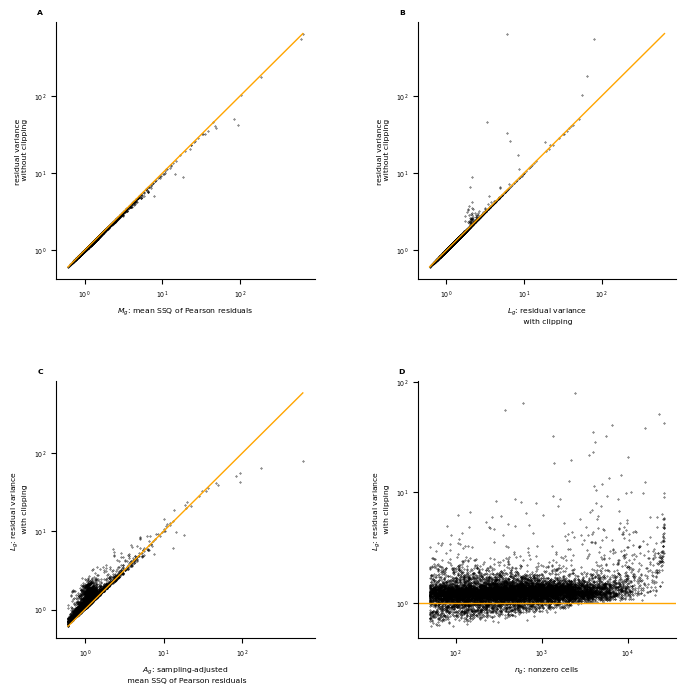

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=( 8, 8) )

plot_ax ( df_compare_Lg, ax1, 'A', 'M_g', 'UNCLIPPED','$M_g$: mean SSQ of Pearson residuals',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax2, 'B', 'L_g', 'UNCLIPPED','$L_g$: residual variance \n with clipping',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax3, 'C', 'A_g', 'L_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$L_g$: residual variance \n with clipping' )
plot_ax ( df_compare_Lg, ax4, 'D', 'nz_cells', 'L_g', '$n_g$: nonzero cells',  '$L_g$: residual variance \n with clipping', line_slope='horizontal' )

plt.subplots_adjust( wspace=0.4, hspace=0.4)

plt.savefig( Lg_plot_dsn, transparent=True, dpi=300 ) 

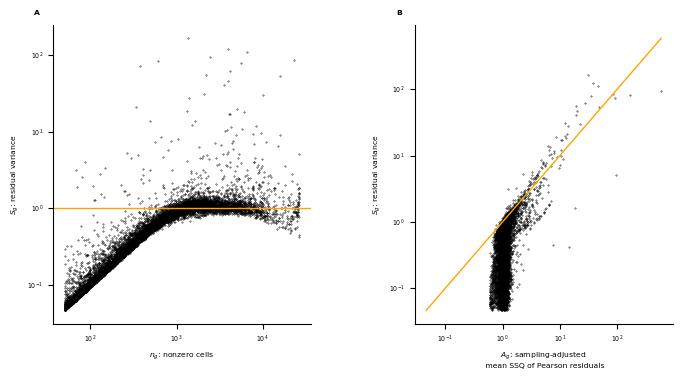

In [11]:
fig, (ax1, ax2)  = plt.subplots(1,2, figsize=( 8., 4.4 ) )

plot_ax ( df_compare_Sg, ax1, 'A',  'nz_cells', 'S_g', '$n_g$: nonzero cells',   '$S_g$: residual variance', line_slope='horizontal'  )
plot_ax ( df_compare_Sg, ax2, 'B', 'A_g', 'S_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$S_g$: residual variance'  )

plt.subplots_adjust( bottom=0.2, wspace=0.4 )

plt.savefig( Sg_plot_dsn, transparent=True, dpi=300 ) 